<a href="https://colab.research.google.com/github/chesterchung1998/Gold-Price-Prediction/blob/main/07_Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the Libraries

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 

## Data Collection and Processing

In [3]:
# Loading the csv data to Pandas DataFrame. 
gold_data = pd.read_csv('gold_price_data.csv')

In [4]:
# Print first 5 rows in the dataframe. 
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# Print last 5 rows of the dataframe. 
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
# Number of rows and columns.
gold_data.shape

(2290, 6)

In [7]:
# Getting some basic information about the data. 
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# Checking the number of missing values. 
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
# Getting the statistical measures of the data. 
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


## Correlation

1. Positive Correlation
2. Negative Correlation

In [11]:
correlation = gold_data.corr()

<ipython-input-11-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

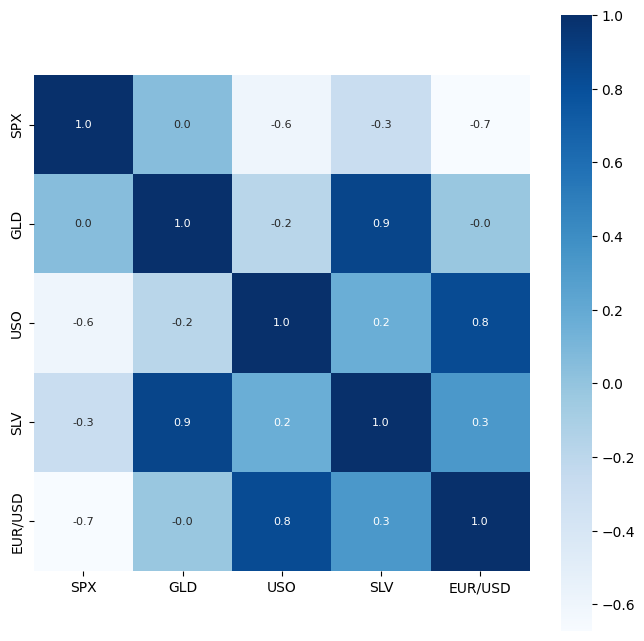

In [12]:
# Constructing a heatmap to understand the correlation. 
plt.figure(figsize = (8, 8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size': 8}, cmap = 'Blues')

In [13]:
# Correlation values of GLD. 
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-14-4915765ccc12>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color = 'green')


<Axes: xlabel='GLD', ylabel='Density'>

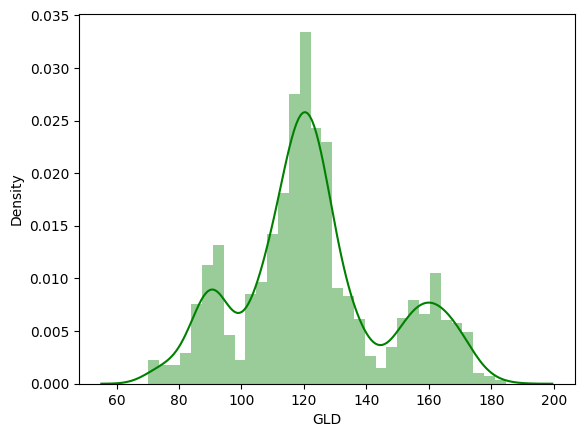

In [14]:
# Checking the distribution of the GLD price. 
sns.distplot(gold_data['GLD'], color = 'green')

## Splitting the Features and Target

In [15]:
X = gold_data.drop(columns = ['Date', 'GLD'], axis = 1)
y = gold_data['GLD']

In [16]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [17]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


## Splitting into training and test data

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

## Model Training

### Random Forest Regressor

In [20]:
regressor = RandomForestRegressor(n_estimators = 100)

In [21]:
# Training the model. 
regressor.fit(X_train, y_train)

RandomForestRegressor()

## Model Evaluation

In [22]:
# Prediction on test data. 
test_data_prediction = regressor.predict(X_test)

In [23]:
print(test_data_prediction)

[168.7079993   81.96389984 115.9612997  127.44620074 120.6330015
 154.78999752 150.20039854 126.13160008 117.4609987  126.00000039
 116.76460079 171.38170055 141.45159873 167.70979942 115.12020005
 117.9113007  138.3424028  170.11140068 159.3262029  158.93429933
 155.18010001 125.04090005 175.84159949 157.11050265 125.20050024
  93.71819962  78.11470014 120.59409997 119.08339925 167.47680022
  88.0641004  125.44060031  91.10130053 117.63370018 121.14739948
 136.17300036 115.39720094 115.40700057 147.70089905 107.29040064
 104.15140245  87.23519802 126.53010039 118.02079998 153.12279891
 119.66690021 108.3408997  108.16149854  93.25030118 127.1175978
  75.44090025 113.61949925 121.42589984 111.38059879 118.77989886
 120.7592995  159.1516004  167.81270129 147.07259686  85.72419849
  94.3591004   86.85189904  90.52369994 118.8186008  126.42980047
 127.40450068 167.49500003 122.26439913 117.43689879  98.45630058
 168.71010091 142.87999823 132.70540242 120.96430206 121.04619937
 119.6735003

In [24]:
# R squared error. 
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.9892232804435446


### Compare actual and predicted values in a plot

In [25]:
y_test = list(y_test)

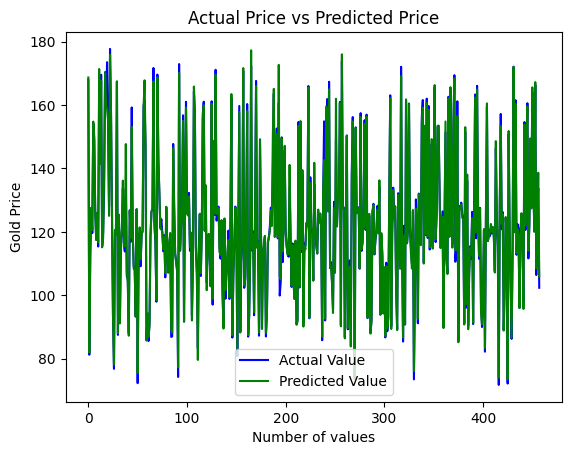

In [26]:
plt.plot(y_test, color = 'blue', label = 'Actual Value')
plt.plot(test_data_prediction, color = 'green', label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()